In [ ]:
#run
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#run
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

sc = StandardScaler()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
url = "/content/drive/MyDrive/cs-training.csv"
data = pd.read_csv(url)
data = data.sample(frac = 1)
data = data.drop(data.iloc[:, 0:1],axis = 1)
trainingdata = imp_mean.fit_transform(data)
data = pd.DataFrame(trainingdata,columns = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

In [ ]:
# sns.pairplot(data = data,hue = "SeriousDlqin2yrs")

In [ ]:
X_data = trainingdata[:,1:]
X_data = sc.fit_transform(X_data)
Y_data_train = trainingdata[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(X_data, Y_data_train, test_size=0.30, random_state = 0)

In [ ]:
urltest = "/content/drive/MyDrive/cs-test.csv"
testingdata = pd.read_csv(urltest)
testingdata = testingdata.drop(columns = {"SeriousDlqin2yrs"})
testingdata = testingdata.drop(testingdata.iloc[:,0:1],axis=1)

In [ ]:
url3 = "/content/drive/MyDrive/sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
y_test = []
for i in data:
  if(i > 0.5):
    y_test.append(1)
  else:
    y_test.append(0)

testingdata["labels"] = y_test
testing_data = testingdata.dropna()
X_test = testing_data.iloc[:,:testing_data.shape[1]-1]
y_test = testing_data.iloc[:,-1]
X_test = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Accuracy Score on training set :- 0.9337333333333333
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     97978
         1.0       0.56      0.04      0.08      7022

    accuracy                           0.93    105000
   macro avg       0.75      0.52      0.52    105000
weighted avg       0.91      0.93      0.91    105000



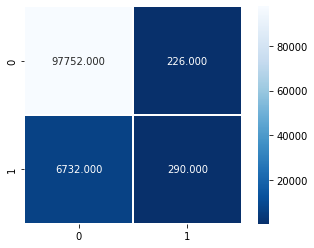

In [ ]:
#run
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model = LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)
arr1 = model.predict(x_train)
score = accuracy_score(y_train,arr1)
print("Accuracy Score on training set :- " + str(score))
print(classification_report(y_train,arr1))
cm = confusion_matrix(y_train,arr1)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score on validate :- 0.9344888888888889
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     41996
         1.0       0.63      0.04      0.08      3004

    accuracy                           0.93     45000
   macro avg       0.78      0.52      0.52     45000
weighted avg       0.92      0.93      0.91     45000



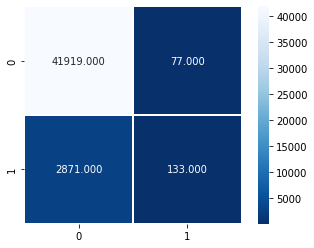

In [ ]:
#run
arr = model.predict(x_validate)
score = accuracy_score(y_validate,arr)
print("Accuracy Score on validate :- " + str(score))
print(classification_report(y_validate,arr))
cm = confusion_matrix(y_validate,arr)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score on test :- 0.9847174447174447
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     80040
           1       0.66      0.18      0.28      1360

    accuracy                           0.98     81400
   macro avg       0.82      0.59      0.64     81400
weighted avg       0.98      0.98      0.98     81400



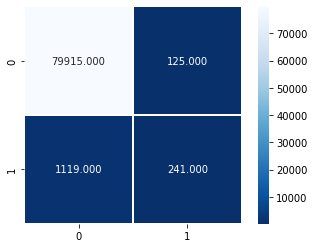

In [ ]:
#run
arr = model.predict(X_test)
score = accuracy_score(y_test,arr)
print("Accuracy Score on test :- " + str(score))
print(classification_report(y_test,arr))
cm = confusion_matrix(y_test,arr)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

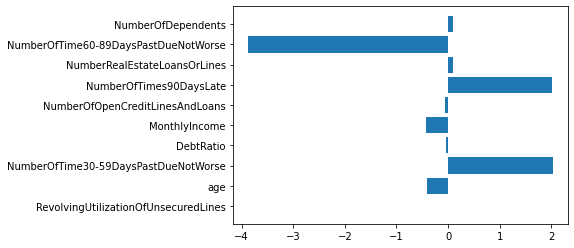

In [ ]:
#run
weights = model.coef_
weight = []
for i in weights:
  for j in i:
    weight.append(j)
arr = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
plt.barh(arr,weight)
plt.show()

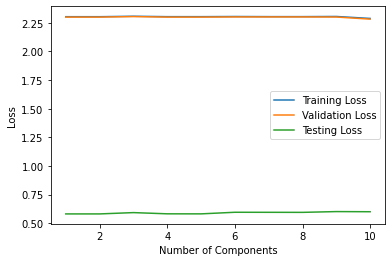

In [ ]:
from sklearn.decomposition import PCA

training_loss = []
validation_loss = []
testing_loss = []
iteration = []
for i in range(1,11):
  iteration.append(i)
  pca = PCA(n_components=i)
  x_train_pca = pca.fit_transform(x_train)
  x_validate_pca = pca.fit_transform(x_validate)
  x_test_pca = pca.fit_transform(X_test)
  model =  LogisticRegression(max_iter = 3000)
  model.fit(x_train_pca,y_train)
  training_loss.append(log_loss(y_train,model.predict(x_train_pca)))
  validation_loss.append(log_loss(y_validate,model.predict(x_validate_pca)))
  testing_loss.append(log_loss(y_test,model.predict(x_test_pca)))


plt.plot(iteration,training_loss,label = "Training Loss")
plt.plot(iteration,validation_loss,label = "Validation Loss")
plt.plot(iteration,testing_loss,label = "Testing Loss")
plt.xlabel("Number of Components")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
data = pd.DataFrame(X_data,columns = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])
data = data.drop(columns = {"NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"})
X_data = data.values
Y_data_train = trainingdata[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(X_data, Y_data_train, test_size=0.30, random_state = 0)

Accuracy Score on training set :- 0.9331428571428572
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     97978
         1.0       0.51      0.01      0.03      7022

    accuracy                           0.93    105000
   macro avg       0.72      0.51      0.50    105000
weighted avg       0.91      0.93      0.90    105000



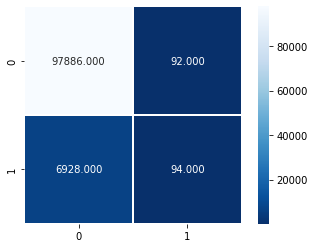

In [ ]:
#run
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model = LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)
arr1 = model.predict(x_train)
score = accuracy_score(y_train,arr1)
print("Accuracy Score on training set :- " + str(score))
print(classification_report(y_train,arr1))
cm = confusion_matrix(y_train,arr1)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score on validate :- 0.9333777777777778
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     41996
         1.0       0.55      0.01      0.02      3004

    accuracy                           0.93     45000
   macro avg       0.74      0.51      0.49     45000
weighted avg       0.91      0.93      0.90     45000



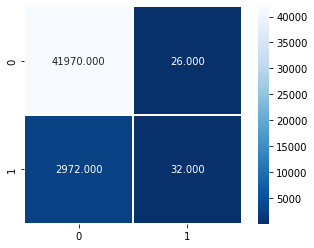

In [ ]:
#run
arr = model.predict(x_validate)
score = accuracy_score(y_validate,arr)
print("Accuracy Score on validate :- " + str(score))
print(classification_report(y_validate,arr))
cm = confusion_matrix(y_validate,arr)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

In [ ]:
urltest = "/content/drive/MyDrive/cs-test.csv"
testingdata = pd.read_csv(urltest)
testingdata = testingdata.drop(columns = {"SeriousDlqin2yrs","NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"})
testingdata = testingdata.drop(testingdata.iloc[:,0:1],axis=1)

In [ ]:
url3 = "/content/drive/MyDrive/sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
y_test = []
for i in data:
  if(i > 0.5):
    y_test.append(1)
  else:
    y_test.append(0)

testingdata["labels"] = y_test
testing_data = testingdata.dropna()
X_test = testing_data.iloc[:,:testing_data.shape[1]-1]
y_test = testing_data.iloc[:,-1]
X_test = sc.fit_transform(X_test)

Accuracy Score on test :- 0.9838329238329239
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80040
           1       0.69      0.06      0.11      1360

    accuracy                           0.98     81400
   macro avg       0.84      0.53      0.55     81400
weighted avg       0.98      0.98      0.98     81400



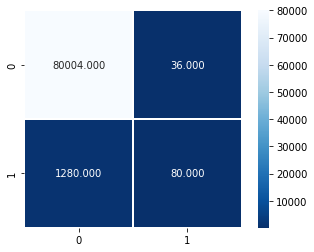

In [ ]:
#run
arr = model.predict(X_test)
score = accuracy_score(y_test,arr)
print("Accuracy Score on test :- " + str(score))
print(classification_report(y_test,arr))
cm = confusion_matrix(y_test,arr)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');